In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


url_to_test = 'https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/images/test_labels.csv'
url_to_training = 'https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/images/train_labels.csv'


df = pd.read_csv(url_to_test, error_bad_lines=False)


unique_classes = df['class'].drop_duplicates()
unique_pictures = df['filename'].drop_duplicates()
nr_of_boxes = len(df)

test_data = [len(unique_classes), len(unique_pictures), nr_of_boxes]

test_table = pd.Series(test_data)
test_table.index = ['Liczba klas', 'Ilość unikalnych zdjęć', 'Ilość bounding boxów']
print('Testy')
print(test_table)

Testy
Liczba klas               4
Ilość unikalnych zdjęć    7
Ilość bounding boxów      7
dtype: int64


In [2]:
df2 = pd.read_csv(url_to_training, error_bad_lines=False)

unique_classes = df2['class'].drop_duplicates()
unique_pictures = df2['filename'].drop_duplicates()
nr_of_boxes = len(df2)

training_data = [len(unique_classes), len(unique_pictures), nr_of_boxes]

training_table = pd.Series(training_data)
training_table.index = ['Liczba klas', 'Ilość unikalnych zdjęć', 'Ilość bounding boxów']
print('\nTrening')
print(training_table)


Trening
Liczba klas                 4
Ilość unikalnych zdjęć    142
Ilość bounding boxów      170
dtype: int64


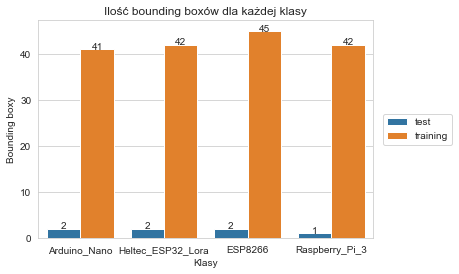

In [3]:
# Zad 2.1 - Ilość bounding boxów dla każdej klasy
#funkcja do nakładania wartośći na słupki wykresu - dla zwieszenia czytelności 
def show_values_on_bars(ax, type):
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        if type == 'int':
            value = int(p.get_height())
        else:
            value = '{:.2f}'.format(p.get_height())
        ax.text(_x, _y, value, ha="center")

sns.set_style("whitegrid")

counts = df["class"].value_counts().reset_index()
counts['type'] = 'test'
counts2 = df2["class"].value_counts().reset_index()
counts2['type'] = 'training'
c = counts.append(counts2, ignore_index = True)

g1 = sns.barplot(x='index', y='class', hue='type', data=c)
g1.set(xlabel='Klasy', ylabel='Bounding boxy', title='Ilość bounding boxów dla każdej klasy')
g1.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

show_values_on_bars(g1, type='int')


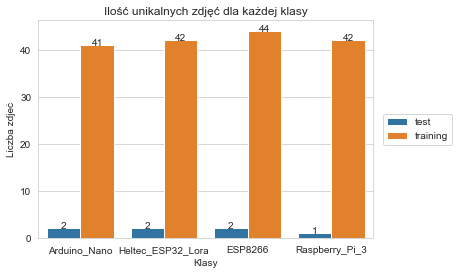

In [4]:
# Zad 2.2 - Ilość unikalnych zdjęć dla każdej klasy
h = df.groupby(['class', 'filename']).size().reset_index() #  grupowanie po klasach oraz zdjeciach
h = h['class'].value_counts().reset_index()
h['type'] = 'test'

h_training = df2.groupby(['class', 'filename']).size().reset_index()
h_training = h_training['class'].value_counts().reset_index()
h_training['type'] = 'training'

h = h.append(h_training, ignore_index = True)


gg = sns.barplot(x='index', y='class', hue='type', data=h)
gg.set(xlabel='Klasy', ylabel='Liczba zdjeć', title='Ilość unikalnych zdjęć dla każdej klasy')
gg.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
show_values_on_bars(gg, type='int')



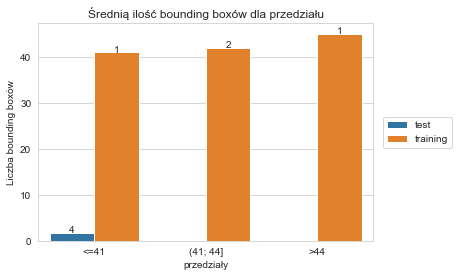

In [5]:

cond1 = c[c['class'] <= 41]
cond2 = c[(c['class'] > 41) & (c['class'] <= 44)]
cond3 = c[c['class'] > 44]

cond1_classes = cond1.groupby('type').size()
cond1_bb_test = cond1[cond1['type']=='test']['class'].sum()
cond1_bb_training = cond1[cond1['type']=='training']['class'].sum()

cond2_classes = cond2.groupby('type').size()
cond2_bb_training = cond2[cond2['type']=='training']['class'].sum()

cond3_classes = cond3.groupby('type').size()
cond3_bb_training = cond3[cond3['type']=='training']['class'].sum()

dframe3 = cond3_classes.to_frame().reset_index()
dframe3['bb'] = cond3_bb_training
dframe3['range'] = '>44'

dframe2 = cond2_classes.to_frame().reset_index()
dframe2['bb'] = cond2_bb_training
dframe2['range'] = '(41; 44]'

dframe = cond1_classes.to_frame().reset_index()
dframe['bb'] = cond1_bb_test, cond1_bb_training
dframe['range'] = '<=41'

dframe = dframe.append([dframe2, dframe3])
dframe.columns.values[1] = 'classes'
dframe.insert(loc=3, column='avg', value=(dframe['bb'] / dframe['classes']) )
dframe.reset_index(drop=True, inplace=True)


zad2_3 = sns.barplot(x="range", y="avg", hue="type", data=dframe)
zad2_3.set(xlabel='przedziały', ylabel='Liczba bounding boxów', title='Średnią ilość bounding boxów dla przedziału')
zad2_3.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

p = [n for n in zad2_3.patches if not np.isnan(n.get_height())]  # lista słupków w grafie (których wysokość nie jest == nan)

for i in range(len(dframe)):
    x = p[i].get_x() + p[i].get_width() / 2
    y = p[i].get_y() + p[i].get_height()
    value = int(dframe.at[i,'classes'])
    zad2_3.text(x,y,value, ha='center')


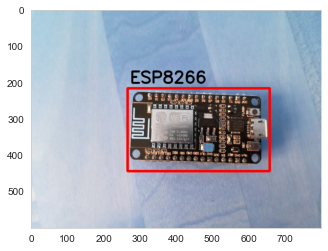

In [15]:
import cv2

def draw_bouding_box(df, path, file_name):
    path = str(path + '\\' + file_name)
    image = cv2.imread(path)
    
    loc = df.loc[df['filename'] == file_name]
    loc = loc.to_numpy()
    
    color = (255,0,0)
    for i in range(len(loc)):
        #ustawnie bouding boxów
        start_point = (int(loc[i][4]), int(loc[i][5])) 
        end_point = (int(loc[i][6]),int(loc[i][7])) 

        image = cv2.rectangle(image, start_point, end_point, color, 5) 

        # wyciągniecie nazwy ukladu scalonego oraz ustawnie pozycji tekstu
        nazwa = loc[i][3]
        if start_point[1] < 30:
            org = start_point[0] + 7, end_point[1] + 35
        else:
            org = start_point[0] + 7, start_point[1] - 15
        image = cv2.putText(image, nazwa, org, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,0), 3, cv2.LINE_AA) 
        
        plt.imshow(image)
        plt.grid(None)

path_test = r'test'
path_train = r'train'

zdjecia_test = ['IMG_20181228_102757.jpg', 'IMG_20181228_102658.jpg']
zdjecia_train = ['IMG_20190104_163951.jpg', 'IMG_20190104_164013.jpg']

draw_bouding_box(df, path_test, zdjecia_test[0])


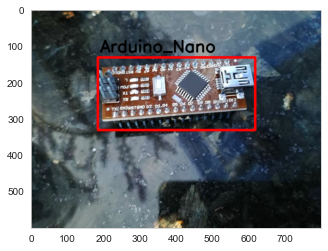

In [7]:
draw_bouding_box(df, path_test, zdjecia_test[1])


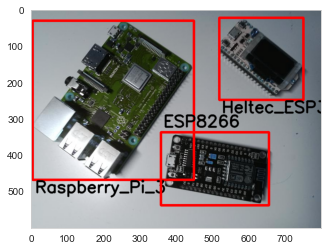

In [8]:
draw_bouding_box(df2, path_train, zdjecia_train[0])


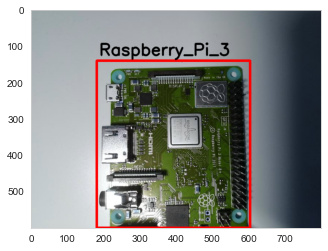

In [9]:
draw_bouding_box(df2, path_train, zdjecia_train[1])